In [48]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"irgiys","key":"36ce6b2f0610c036cc4e891ed820ad7a"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


# Downloads datasets

In [5]:
!kaggle datasets download -d prosperchuks/health-dataset

  0% 0.00/1.00M [00:00<?, ?B/s]
100% 1.00M/1.00M [00:00<00:00, 113MB/s]


# Buat folder lalu extract zip hasil download

In [6]:
!mkdir health-dataset
!unzip health-dataset.zip -d health-dataset
!ls health-dataset

Archive:  health-dataset.zip
  inflating: health-dataset/diabetes_data.csv  
  inflating: health-dataset/hypertension_data.csv  
  inflating: health-dataset/stroke_data.csv  
diabetes_data.csv  hypertension_data.csv  stroke_data.csv


# Import package yang diperlukan

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load datasets

In [8]:
df = pd.read_csv("health-dataset/hypertension_data.csv")

# Exploratory Data Analisis

In [9]:
# Cek / hitung data null pada tiap-tiap kolom
df.isnull().sum()

age          0
sex         25
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

In [10]:
# Hapus data null
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
df = df.reset_index(drop=True)

In [11]:
# Cek / hitung data duplikat pada dataframe
df[df.duplicated()].value_counts()

Series([], dtype: int64)

In [12]:
# Hapus data duplikat
df.drop_duplicates(inplace=True)

In [13]:
# Membuat temporary dataframe
temp_df = df.copy()

In [49]:
# Ubah data numerik menjadi kategorikal
temp_df["target"] = temp_df["target"].map({0: "Normal", 1:"Hypertension"})
temp_df["sex"] = temp_df["sex"].map({0:"Female", 1:"Male"})
temp_df['cp']= temp_df['cp'].map({0:'typical angina',1:'atypical angina',2:'non-anginal pain',3:'asymptomatic'})
temp_df['restecg']= temp_df['restecg'].map({0:'Normal',1:'ST-T abnormal',2:'Left ventricular'})
temp_df['exang']= temp_df['exang'].map({0:'No',1:'Yes'})

In [15]:
# Cek tipe data tiap kolom pada dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26058 entries, 0 to 26057
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26058 non-null  float64
 1   sex       26058 non-null  float64
 2   cp        26058 non-null  int64  
 3   trestbps  26058 non-null  int64  
 4   chol      26058 non-null  int64  
 5   fbs       26058 non-null  int64  
 6   restecg   26058 non-null  int64  
 7   thalach   26058 non-null  int64  
 8   exang     26058 non-null  int64  
 9   oldpeak   26058 non-null  float64
 10  slope     26058 non-null  int64  
 11  ca        26058 non-null  int64  
 12  thal      26058 non-null  int64  
 13  target    26058 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 3.0 MB


In [16]:
# Tampilkan sampel data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
# Deskripsikan dataframe
# Disini terdapat nilai min dan max pada kolom yang dimana bisa digunakan pada aturan inputan feature
display(df.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,26058.000000,26058.00000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000
mean,55.655730,0.50000,0.956635,131.590682,246.286591,0.149896,0.526057,149.643181,0.326886,1.039742,1.399724,0.720623,2.319057,0.547778
std,15.190407,0.50001,1.022467,17.597086,51.651701,0.356977,0.525688,22.865871,0.469084,1.165673,0.616529,1.011317,0.604868,0.497722
min,11.000000,0.00000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.00000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,0.50000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,67.000000,1.00000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,98.000000,1.00000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [18]:
# Hitung persentase pasien yang memiliki atau tidak hipertensi
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Persentase pasien tidak memiliki hipertensi: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentase pasien memiliki hipertensi: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Persentase pasien tidak memiliki hipertensi: 45.22%
Percentase pasien memiliki hipertensi: 54.78%


In [19]:
# Hitung jumlah pasien yang memiliki atau tidak hipertensi
temp_df["target"].value_counts()

Hypertension    14274
Normal          11784
Name: target, dtype: int64

In [20]:
# Hitung jenis kelamin laki-laki dan perempuan
temp_df["sex"].value_counts()

Male      13029
Female    13029
Name: sex, dtype: int64

In [21]:
# Hitung jumlah perempuan yang memliki atau tidak hipertensi
femaleInfected = df[(df['sex'] == 0) & (df['target'] == 1)]
femaleNotInfected = df[(df['sex'] == 0) & (df['target'] == 0)]
femaleInfectedCount = femaleInfected.shape[0]
femaleNotInfectedCount = femaleNotInfected.shape[0]
print("Jumlah perempuan dengan hipertensi:", femaleInfectedCount)
print("Jumlah perempuan tidak dengan hipertensi:", femaleNotInfectedCount)

Jumlah perempuan dengan hipertensi: 7137
Jumlah perempuan tidak dengan hipertensi: 5892


In [22]:
# Hitung jumlah laki-laki yang memliki atau tidak hipertensi
maleInfected = df[(df['sex'] == 1) & (df['target'] == 1)]
maleNotInfected = df[(df['sex'] == 1) & (df['target'] == 0)]
maleInfectedCount = maleInfected.shape[0]
maleNotInfectedCount = maleNotInfected.shape[0]
print("Jumlah perempuan dengan hipertensi:", maleInfectedCount)
print("Jumlah perempuan tidak dengan hipertensi:", maleNotInfectedCount)

Jumlah perempuan dengan hipertensi: 7137
Jumlah perempuan tidak dengan hipertensi: 5892


In [23]:
# Inisialisasi ukuran plot
plt.rcParams['figure.figsize'] = (10,9)

<Axes: >

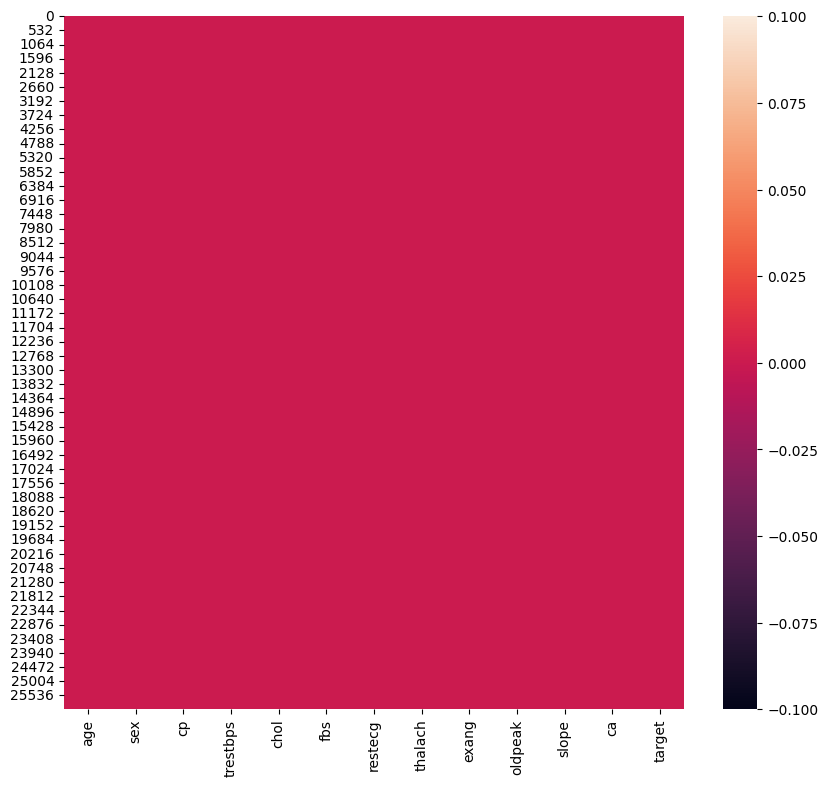

In [46]:
sns.heatmap(df.isnull())

<Axes: >

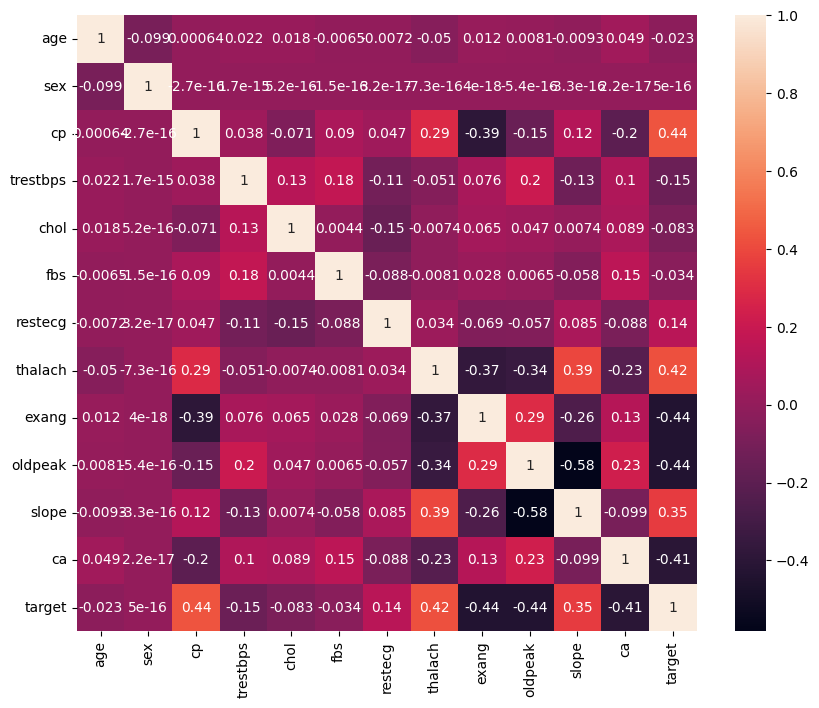

In [47]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
# dapat dilihat pada heatmap dibawah cp, restecg, thalach, slope memiliki korelisi pada target yang lebih tinggi pada target dibandingkan kolom yang lain

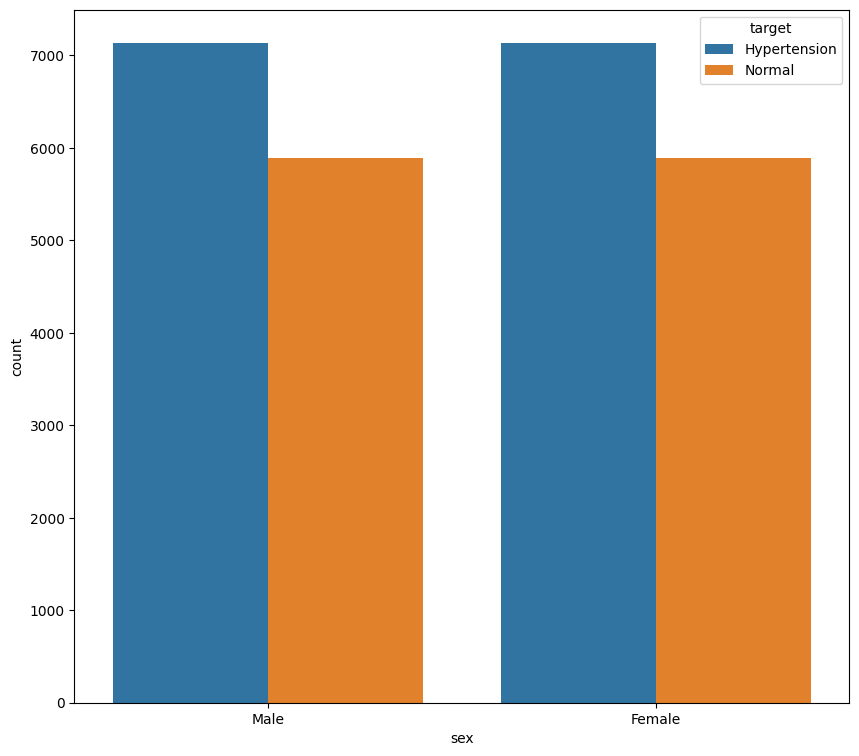

In [24]:
sns.countplot(x="sex", data=temp_df,hue="target")
plt.show()

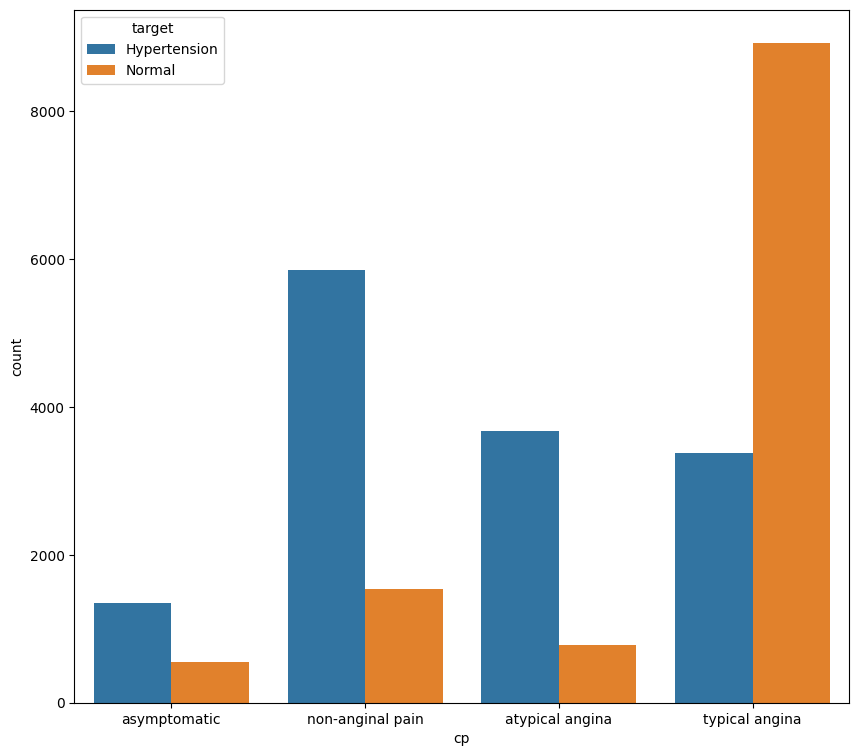

In [25]:
sns.countplot(x="cp", data=temp_df,hue="target")
plt.show()

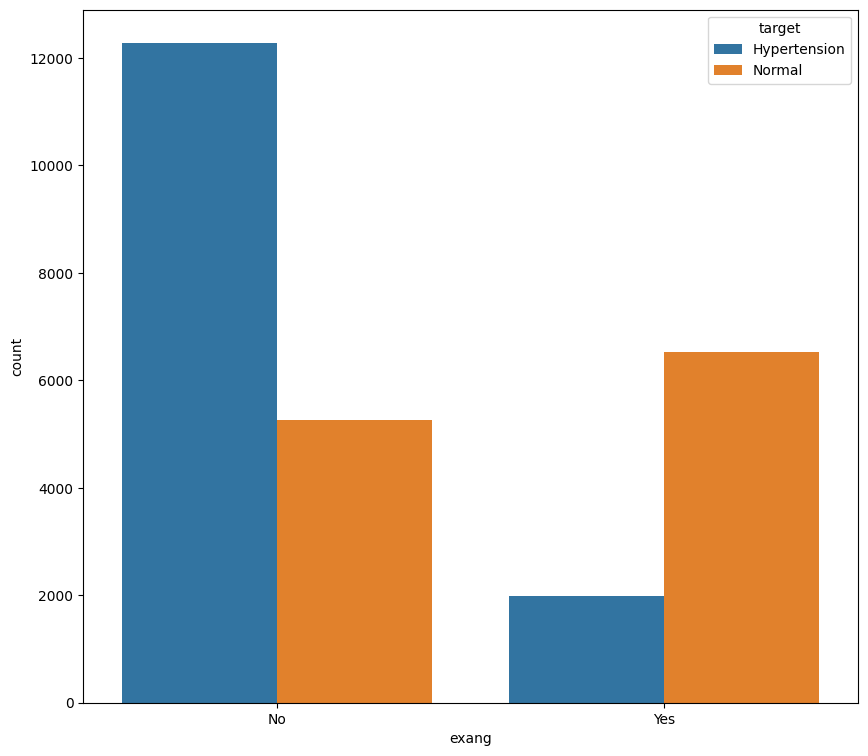

In [26]:
sns.countplot(x="exang", data=temp_df,hue="target")
plt.show()

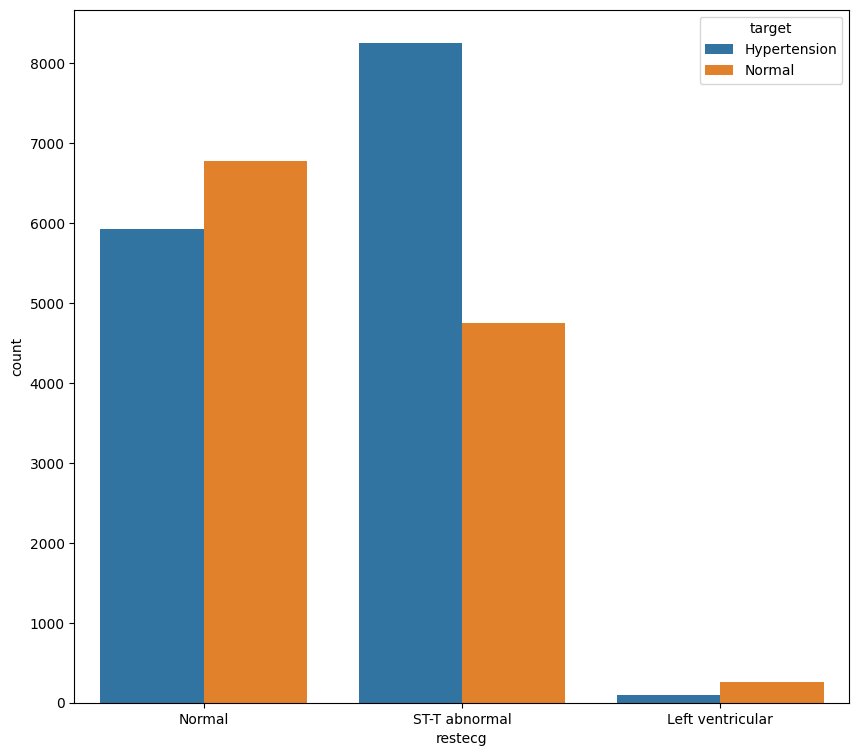

In [28]:
sns.countplot(x="restecg", data=temp_df,hue="target")
plt.show()

In [33]:
# Hapus kolom thal karena kurangnya penjelasan pada dataset
df.drop(columns=["thal"], inplace=True)

# Feature

In [34]:
X = df.drop(columns="target", axis=1)
Y = df["target"]

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [36]:
X.shape, X_train.shape

((26058, 12), (20846, 12))

# Membuat model

In [37]:
# Disini menggunakan max_iter untuk menghilangkan ConvergenceWarning
model = LogisticRegression(max_iter=1000)

In [38]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [39]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [40]:
print("Akurasi data training : ", training_data_accuracy)

Akurasi data training :  0.8196776359973136


In [41]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test )

In [42]:
print("Akurasi data test : ", test_data_accuracy)

Akurasi data test :  0.8242517267843438


# Buat data prediksi

In [43]:
# kena
input_data =  np.array([57.0,1.0,3,145,233,1,0,150,0,2.3,0,0])
# tidak
# input_data =  np.array([62.0,0.0,0,160,286,0,0,108,1,1.5,1,3])
input_data_reshaped = input_data.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)
if (prediction[0] == 0) :
    print("Pasien tidak terkena darah tinggi")
else :
    print("Pasien terkena penyakit darah tinggii")

[1]
Pasien terkena penyakit darah tinggii


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Simpan Model

In [44]:
import pickle

In [45]:
filename = 'hypertension.sav'
pickle.dump(model, open(filename, 'wb'))